AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [6]:
import pandas as pd

file_path = '.\\titanic.csv'
titanic_df = pd.read_csv(file_path)

first_10_rows = titanic_df.head(10)

last_20_rows = titanic_df.tail(20)

info = titanic_df.info()

description = titanic_df.describe()

summary = {
    'First 10 Rows': first_10_rows.to_dict(orient='records'),
    'Last 20 Rows': last_20_rows.to_dict(orient='records'),
    'Info': [info],
    'Description': description.to_dict()
}

summary_df = pd.DataFrame({
    'Metric': ['First 10 Rows', 'Last 20 Rows', 'Info', 'Description'],
    'Value': [first_10_rows, last_20_rows, str(info), description]
})

print(summary_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB
          Metric                                              Value
0  First 10 Rows     PassengerId Survived  Pclass  \
0          ...
1   Last 20 Rows       PassengerId Survived  Pclass  \
871      ...
2           Info                        

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


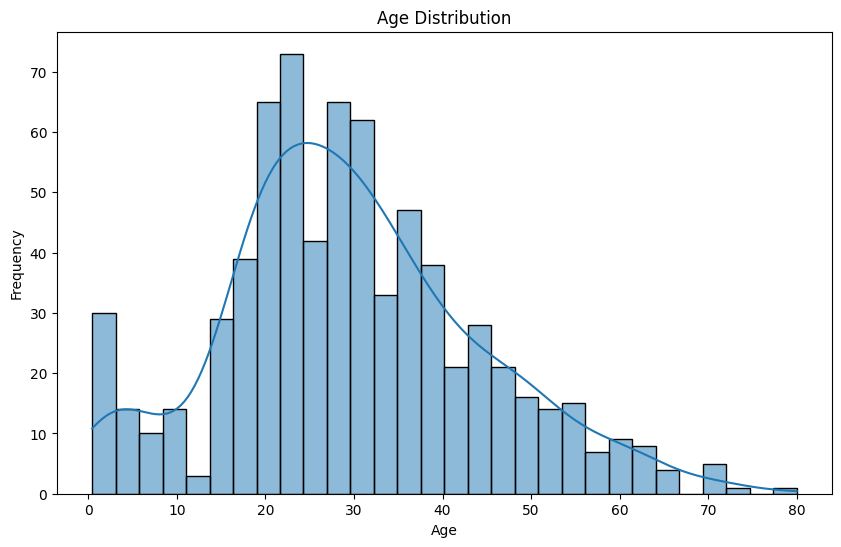

There is incorrect data, deal with it.
Missing value statistics:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '.\\titanic.csv'
titanic_df = pd.read_csv(file_path)

missing_values = titanic_df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

median_age = titanic_df['Age'].median()

titanic_df['Age'].fillna(median_age, inplace=True)

titanic_df['Has_Cabin'] = titanic_df['Cabin'].notnull().astype(int)

most_common_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(most_common_embarked, inplace=True)

if not titanic_df['Survived'].isin([0, 1]).all():
    print("There is incorrect data, deal with it.")
    titanic_df = titanic_df[titanic_df['Survived'].isin([0, 1])]

titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

print("Missing value statistics:")
print(missing_values)

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

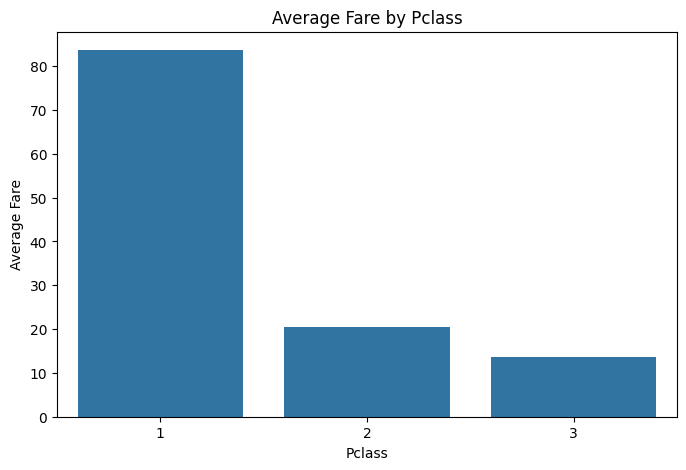

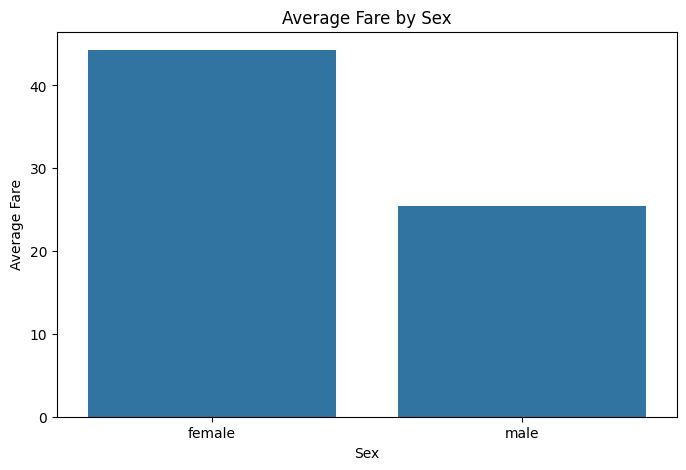

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '.\\titanic.csv'
titanic_df = pd.read_csv(file_path)

titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

average_fare_by_pclass = titanic_df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_by_pclass.index, y=average_fare_by_pclass.values)
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()

average_fare_by_sex = titanic_df.groupby('Sex')['Fare'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_by_sex.index, y=average_fare_by_sex.values)
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.show()


AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

Column 'Survived' contains non-numeric data.
Column 'Name' contains non-numeric data.
Column 'Sex' contains non-numeric data.
Column 'Ticket' contains non-numeric data.
Column 'Fare' contains non-numeric data.
Column 'Cabin' contains non-numeric data.
Column 'Embarked' contains non-numeric data.


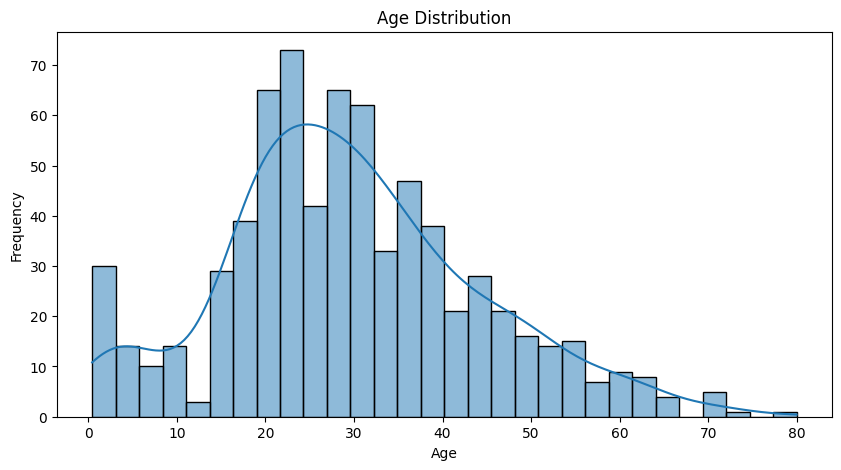

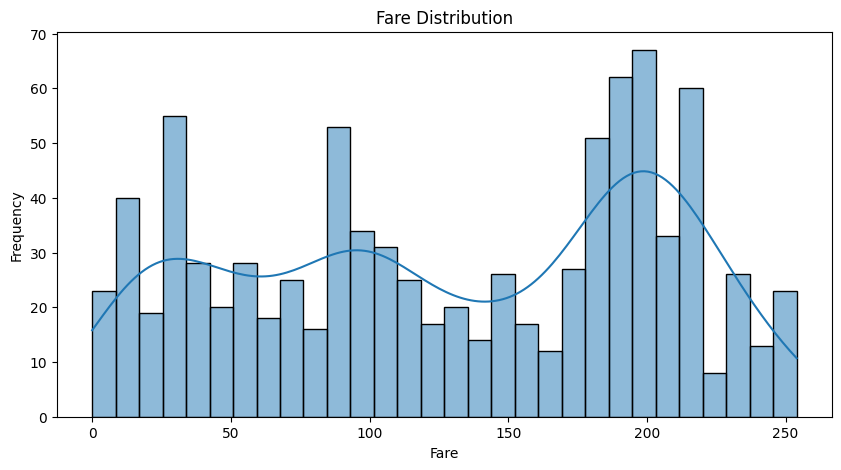

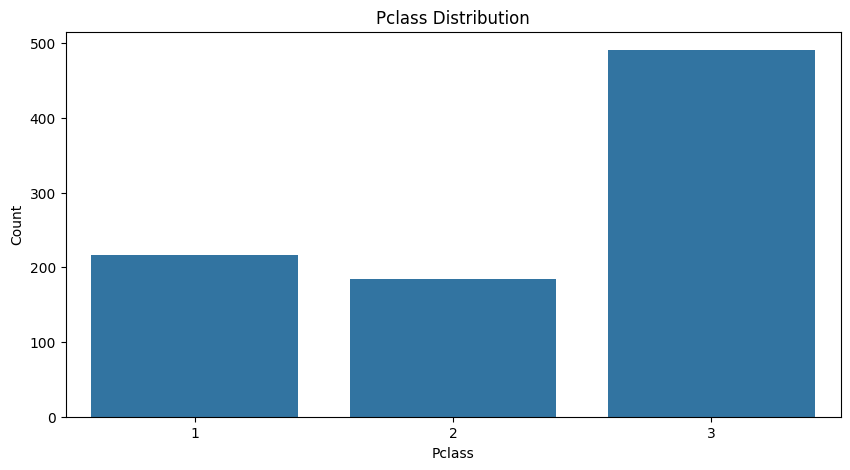

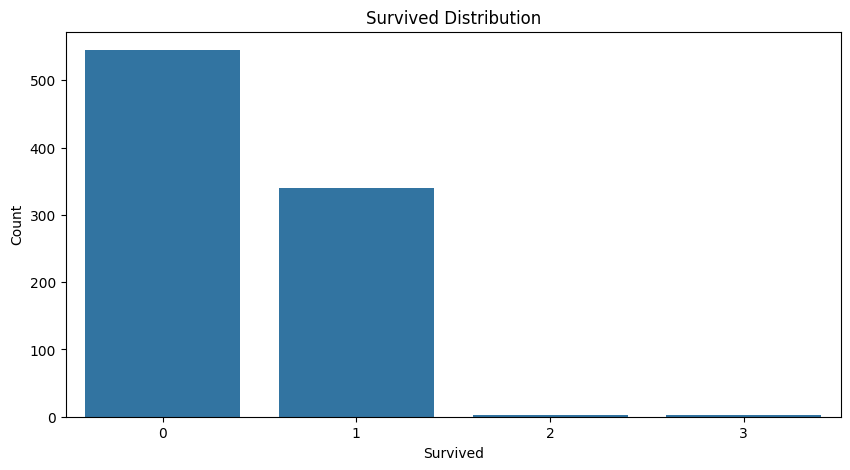

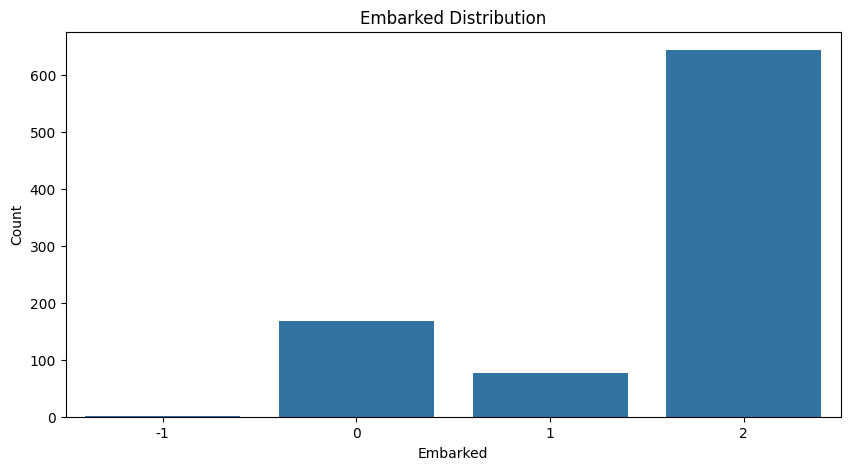

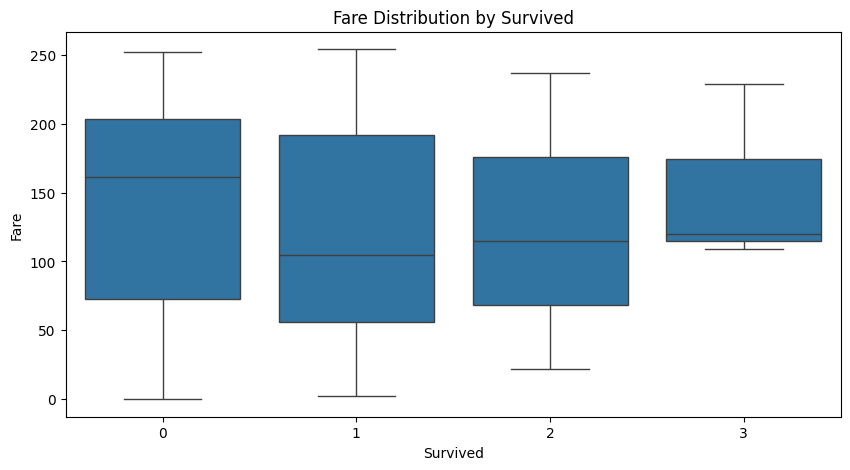

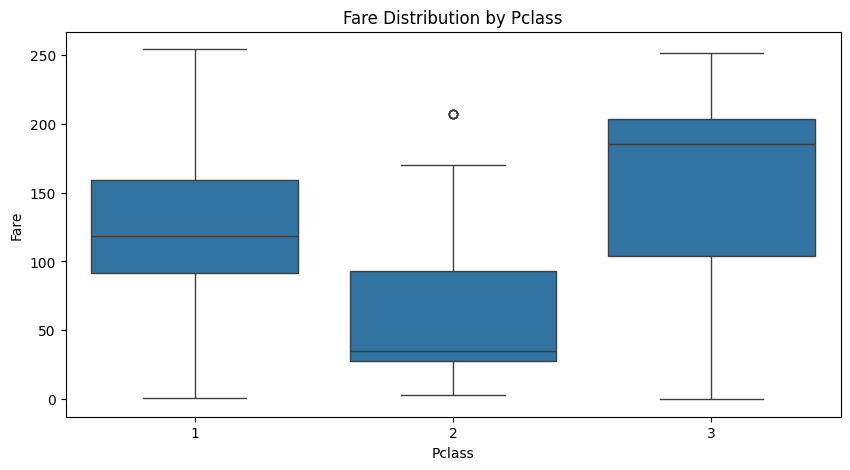

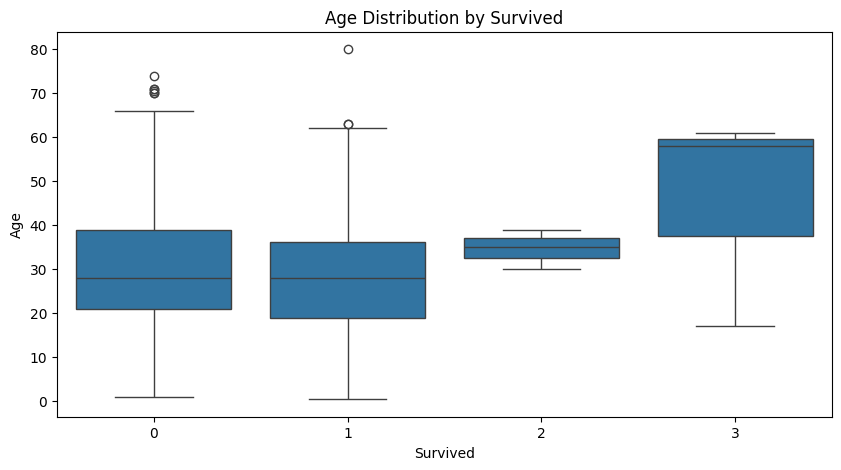

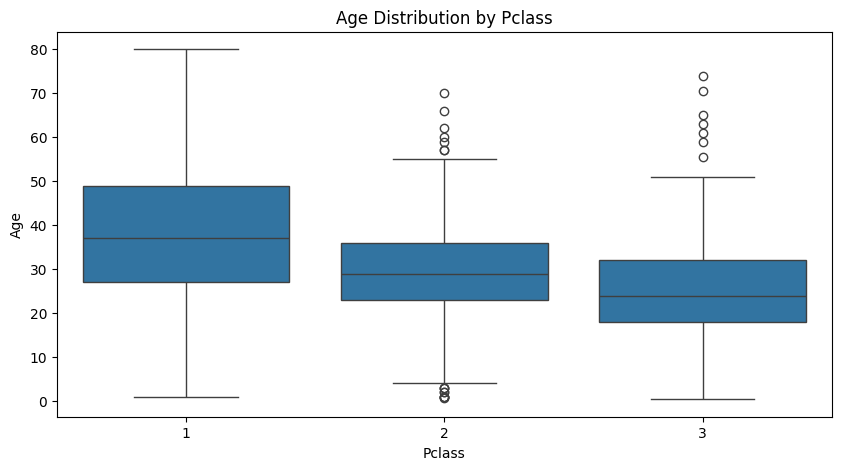

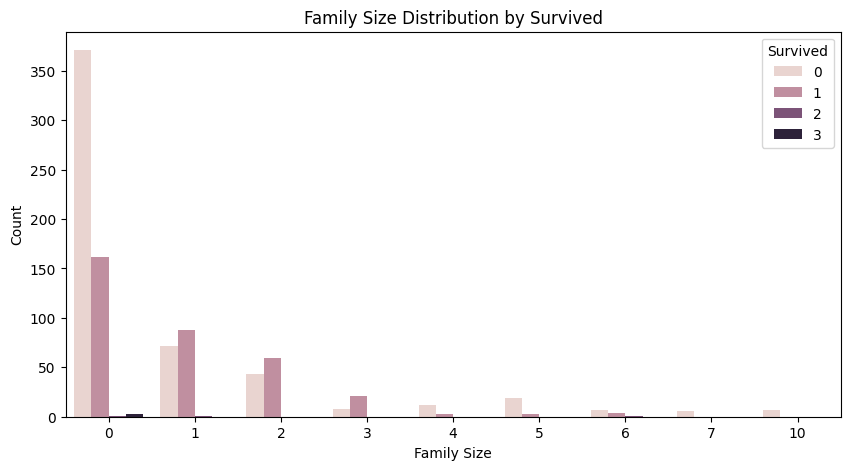

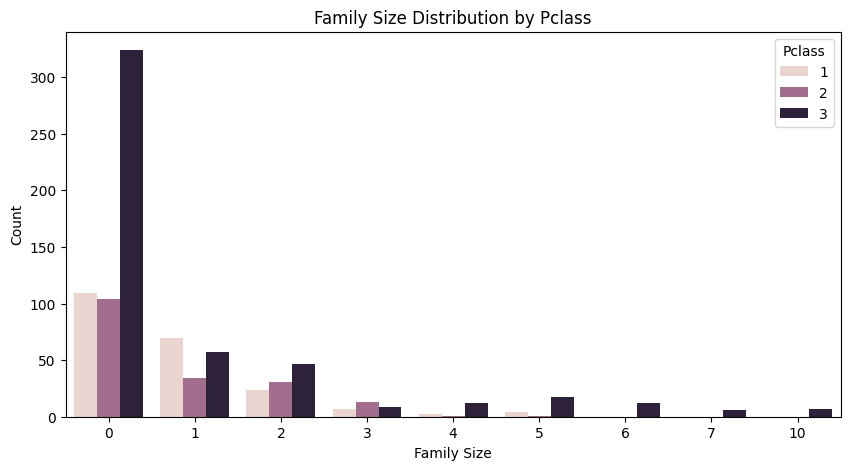

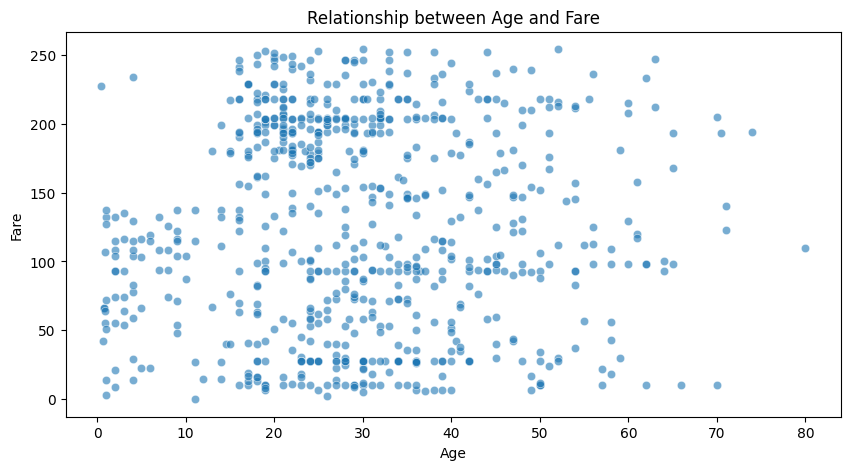

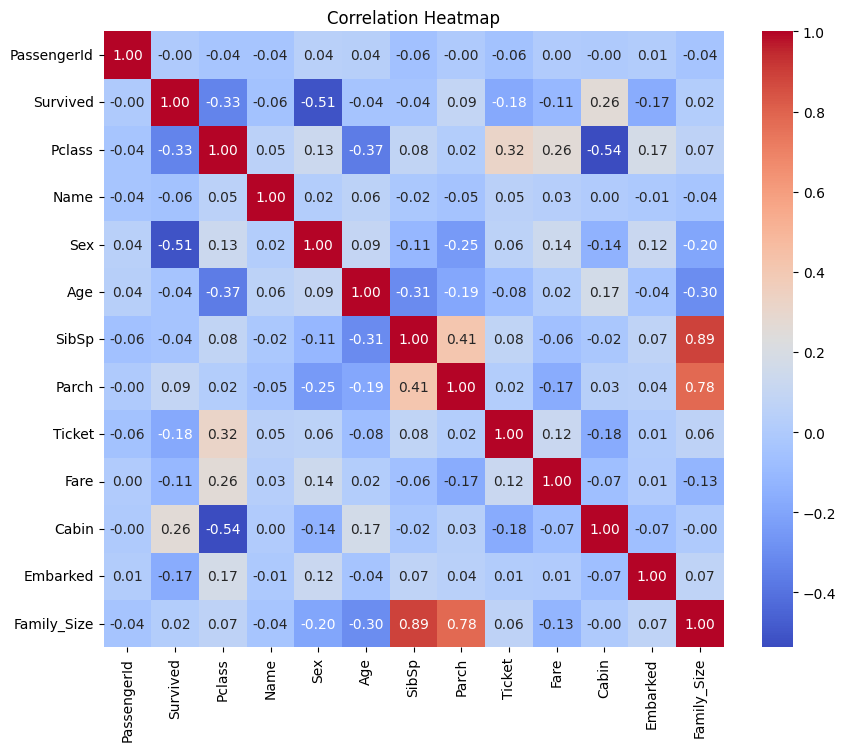

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '.\\titanic.csv'
titanic_df = pd.read_csv(file_path)

for col in titanic_df.columns:
    if titanic_df[col].dtype == 'object':
        print(f"Column '{col}' contains non-numeric data.")
        titanic_df[col] = titanic_df[col].astype('category').cat.codes

for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    titanic_df[col] = pd.to_numeric(titanic_df[col], errors='coerce')
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

if titanic_df['Embarked'].dtype == 'object':
    titanic_df['Embarked'] = titanic_df['Embarked'].astype('category').cat.codes

# Age
plt.figure(figsize=(10, 5))
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Fare
plt.figure(figsize=(10, 5))
sns.histplot(titanic_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Pclass
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Survived
plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Embarked
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Fare Survived
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

# Fare Pclass
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Age Survived
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Age Pclass
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# SibSp & Parch Survived
titanic_df['Family_Size'] = titanic_df['SibSp'] + titanic_df['Parch']
plt.figure(figsize=(10, 5))
sns.countplot(x='Family_Size', hue='Survived', data=titanic_df)
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# SibSp & Parch Pclass
plt.figure(figsize=(10, 5))
sns.countplot(x='Family_Size', hue='Pclass', data=titanic_df)
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Age Fare
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Fare', data=titanic_df, alpha=0.6)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Others
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

Correlation Matrix:
              PassengerId  Survived    Pclass      Name       Sex       Age  \
PassengerId     1.000000 -0.000575 -0.035144 -0.038559  0.042939  0.036847   
Survived       -0.000575  1.000000 -0.334433 -0.056171 -0.509103 -0.041759   
Pclass         -0.035144 -0.334433  1.000000  0.052831  0.131900 -0.369226   
Name           -0.038559 -0.056171  0.052831  1.000000  0.020314  0.062583   
Sex             0.042939 -0.509103  0.131900  0.020314  1.000000  0.093254   
Age             0.036847 -0.041759 -0.369226  0.062583  0.093254  1.000000   
SibSp          -0.057527 -0.040761  0.083081 -0.017230 -0.114631 -0.308247   
Parch          -0.001652  0.090478  0.018443 -0.049105 -0.245489 -0.189119   
Ticket         -0.056554 -0.178409  0.319869  0.047348  0.059372 -0.075934   
Fare            0.013986  0.237652 -0.545853 -0.046381 -0.181212  0.097669   
Cabin          -0.000637  0.259417 -0.537419  0.003122 -0.137704  0.167432   
Embarked        0.012985 -0.168652  0.17351

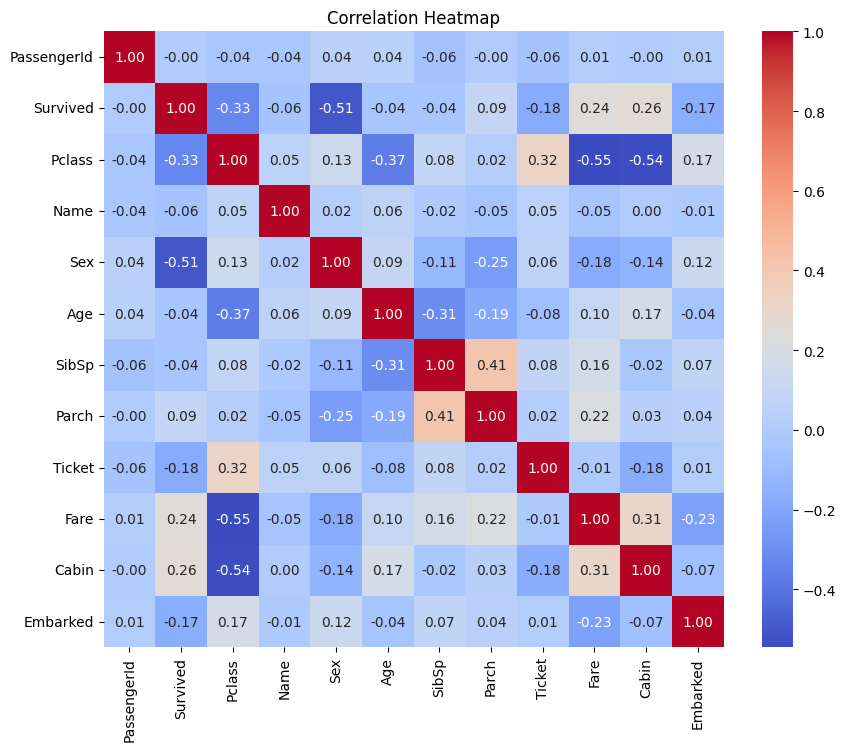

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '.\\titanic.csv'
titanic_df = pd.read_csv(file_path)

for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    titanic_df[col] = pd.to_numeric(titanic_df[col], errors='coerce')
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

for col in titanic_df.select_dtypes(include=['object']).columns:
    titanic_df[col] = titanic_df[col].astype('category').cat.codes

correlation_matrix = titanic_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

age_fare_correlation = titanic_df['Age'].corr(titanic_df['Fare'])
print(f"Correlation between 'Age' and 'Fare': {age_fare_correlation:.2f}")

pclass_survived_correlation = titanic_df['Pclass'].corr(titanic_df['Survived'])
print(f"Correlation between 'Pclass' and 'Survived': {pclass_survived_correlation:.2f}")

sibsp_survived_correlation = titanic_df['SibSp'].corr(titanic_df['Survived'])
print(f"Correlation between 'SibSp' and 'Survived': {sibsp_survived_correlation:.2f}")

parch_survived_correlation = titanic_df['Parch'].corr(titanic_df['Survived'])
print(f"Correlation between 'Parch' and 'Survived': {parch_survived_correlation:.2f}")

age_pclass_correlation = titanic_df['Age'].corr(titanic_df['Pclass'])
print(f"Correlation between 'Age' and 'Pclass': {age_pclass_correlation:.2f}")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()